In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Neural Network to predict the popularity of Musical Tracks

We will use a sample of data collected by the music streaming service Spotify to create the model.

We will split the data, using some for training and some for testing.

The data is in a csv format.

There are over 114,000 rows in this data set, and each row corresponds with a track.

- Each track contains 21 columns and each column refers to a different piece of data for the track. They are as follows:
- track_id: The Spotify ID for the track
- artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: The album name in which the track appears
- track_name: Name of the track
- popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- duration_ms: The track length in milliseconds
- explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- loudness: The overall loudness of a track in decibels (dB)
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- track_genre: The genre in which the track belongs

In [103]:
df = pd.read_csv('dataset.csv')

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


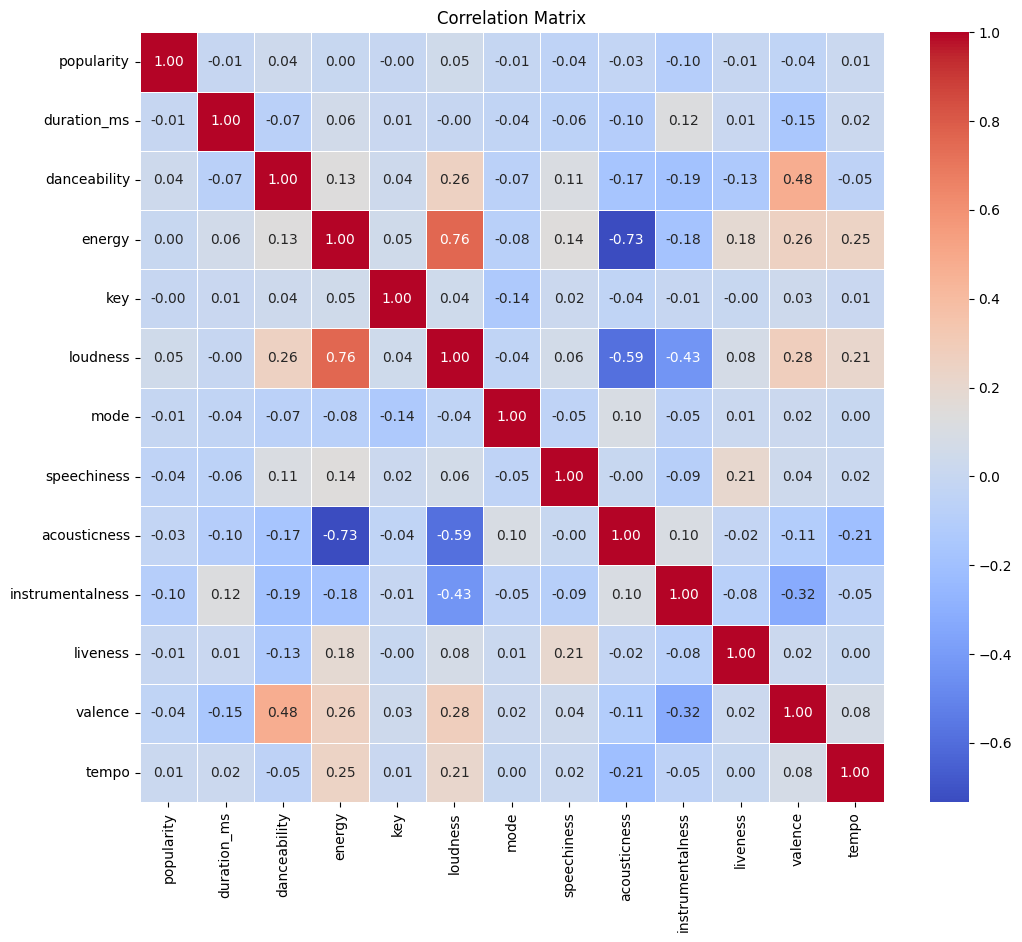

In [104]:
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',]
corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

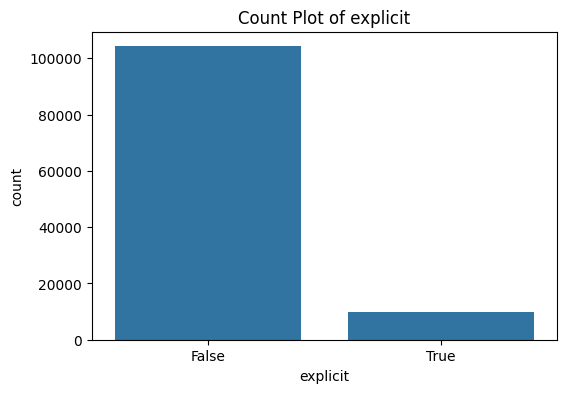

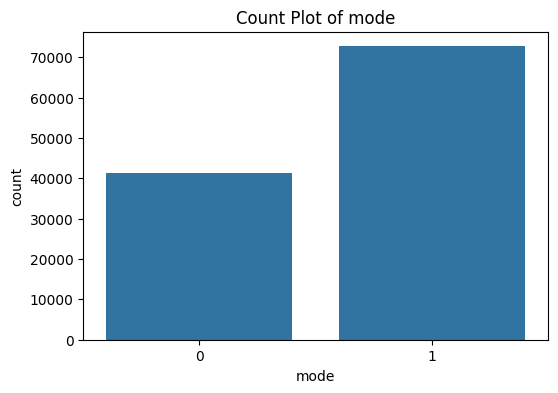

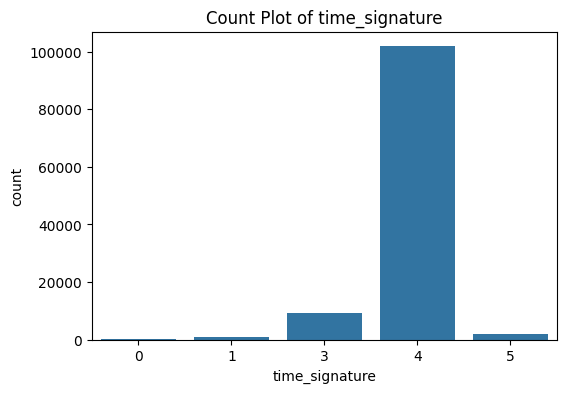

In [105]:
categorical_columns = ['explicit', 'mode', 'time_signature']

# Plotting count plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.show()

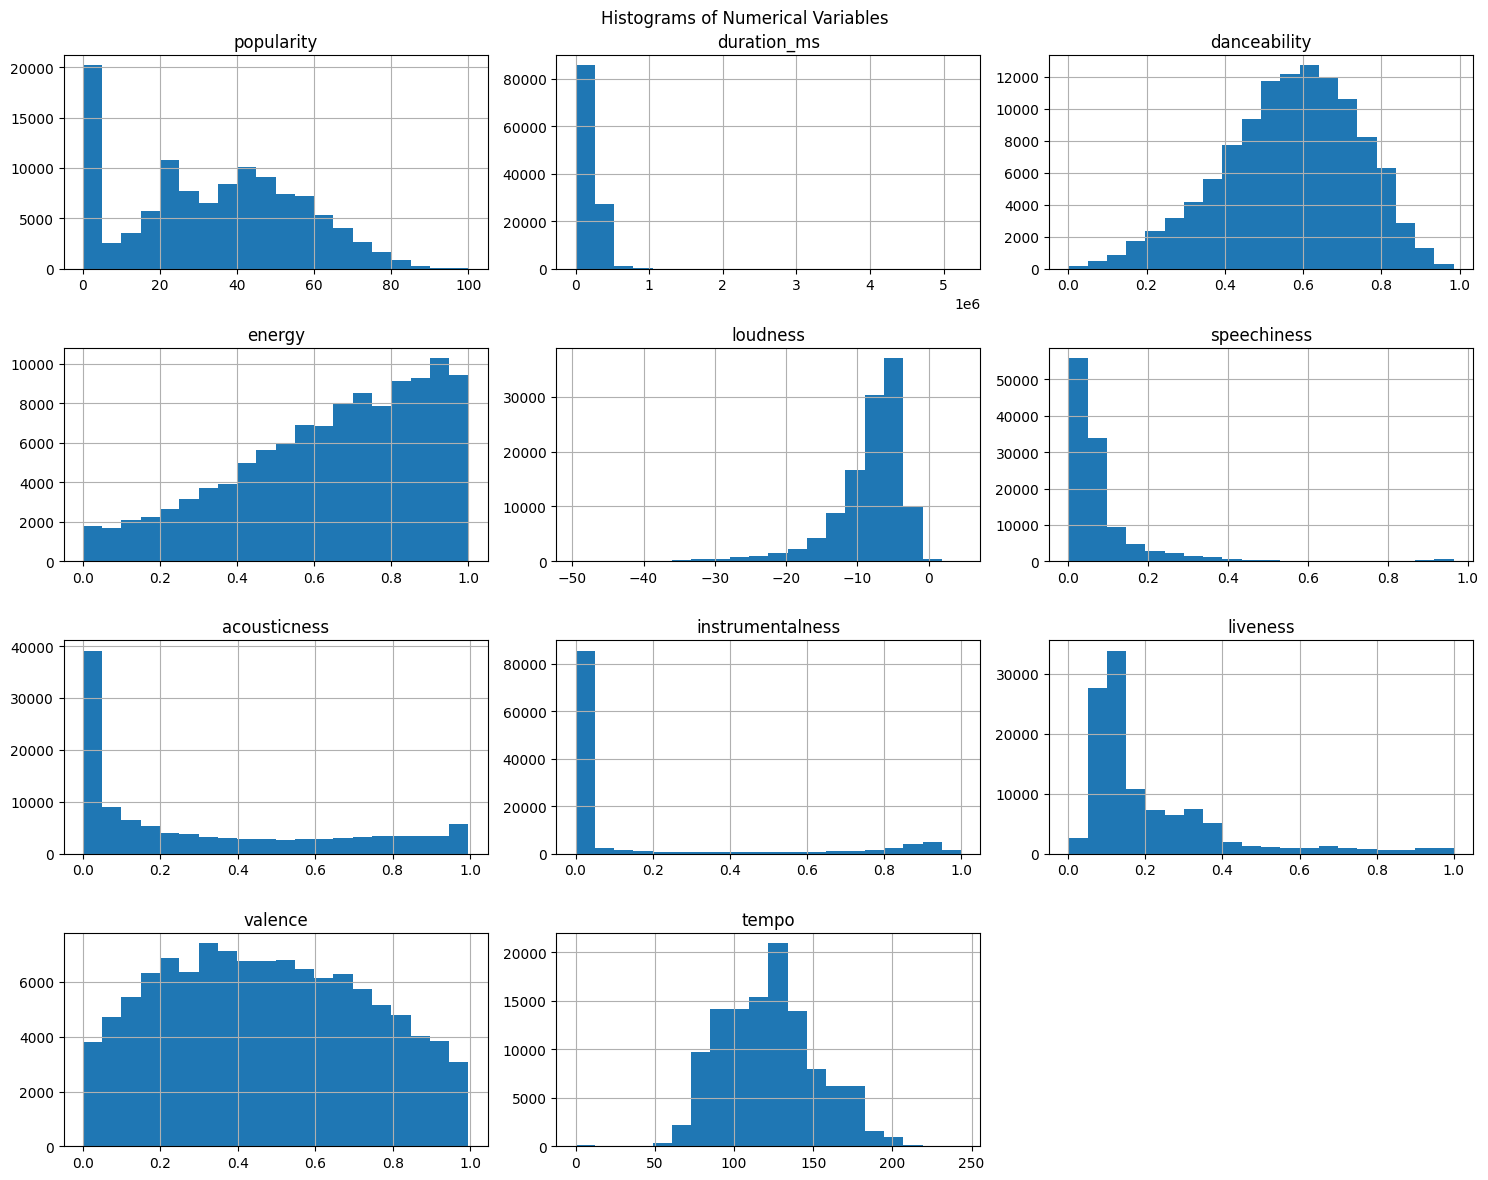

In [106]:
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df[numerical_columns].hist(bins=20, figsize=(15, 12), layout=(4, 3))
plt.suptitle('Histograms of Numerical Variables')
plt.tight_layout()
plt.show()

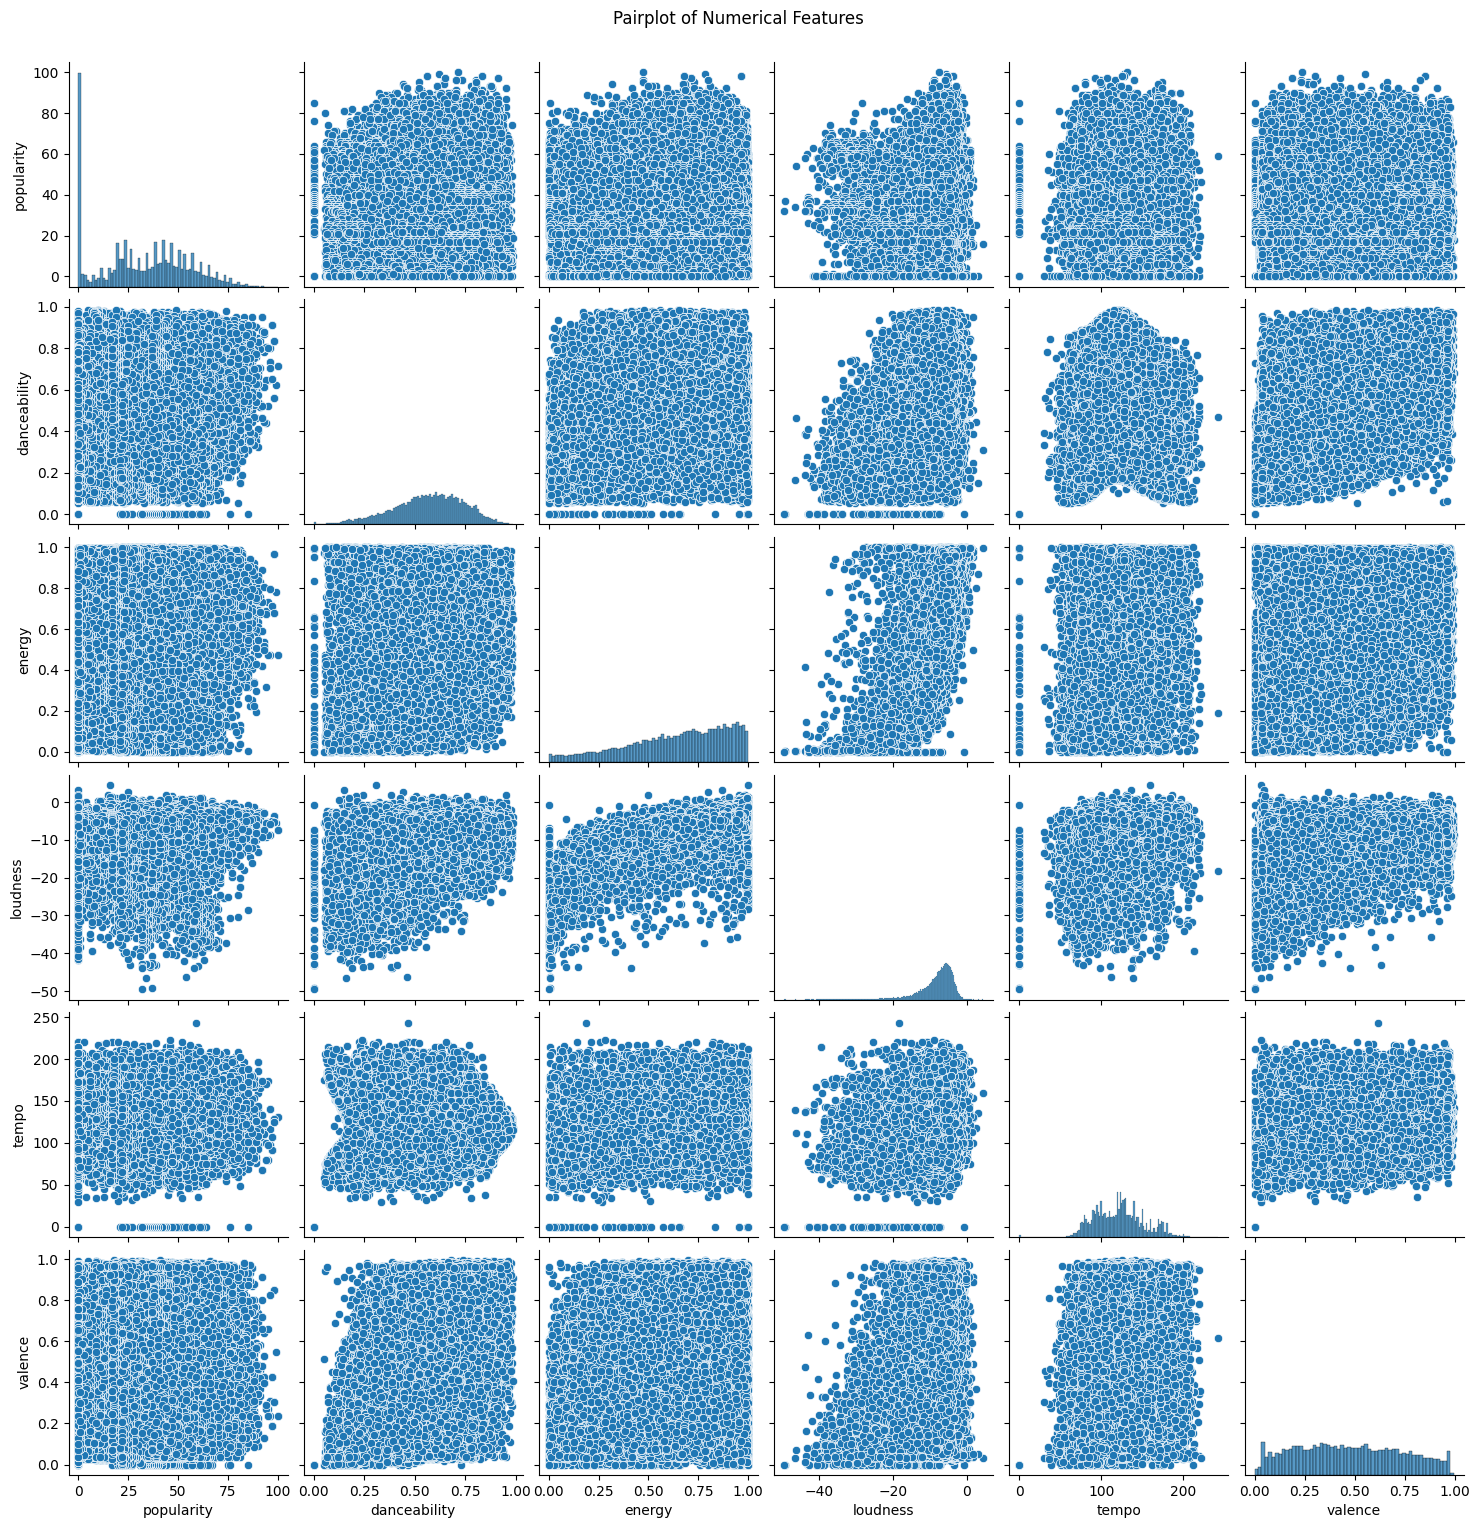

In [107]:
# Pairplot to visualize relationships between numerical features
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 'valence']
sns.pairplot(df[numerical_columns], height=2.5)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


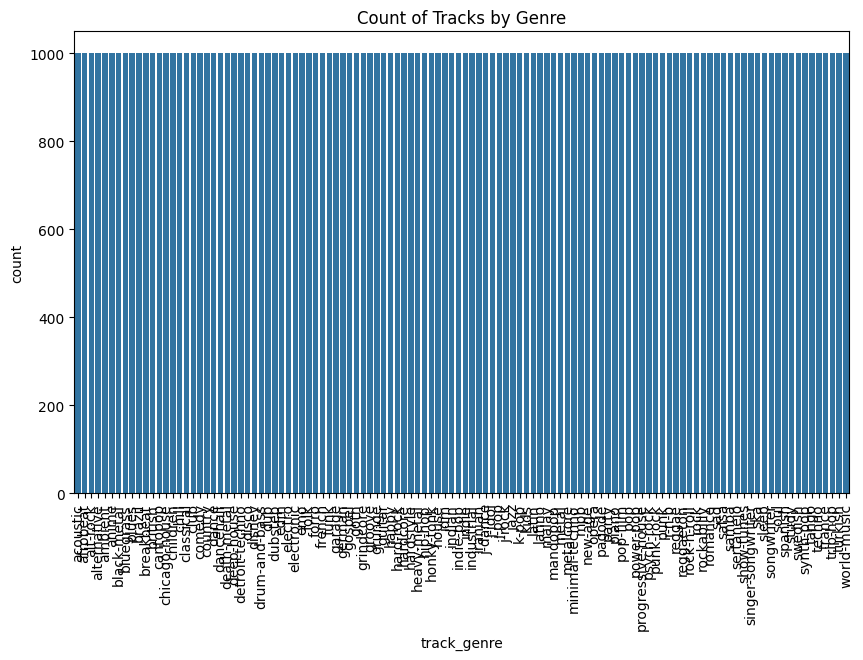

In [108]:
# Count plot of Track Genres
plt.figure(figsize=(10, 6))
sns.countplot(x='track_genre', data=df)
plt.title('Count of Tracks by Genre')
plt.xticks(rotation=90)
plt.show()

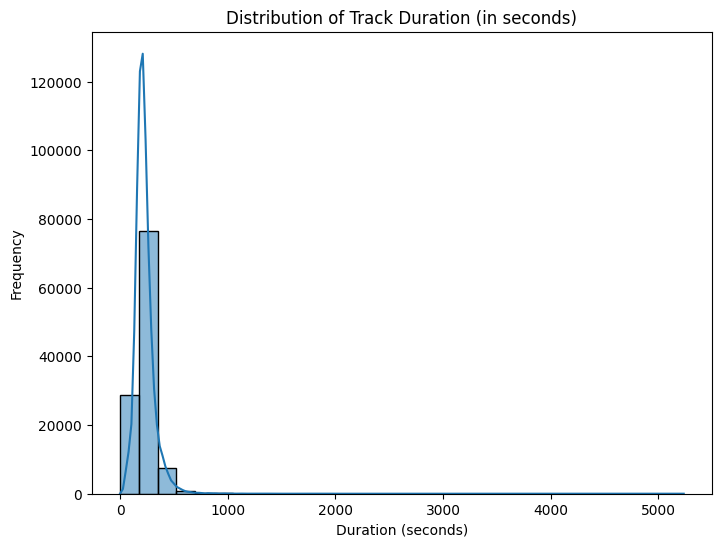

In [109]:
plt.figure(figsize=(8, 6))
sns.histplot(df['duration_ms'] / 1000, bins=30, kde=True)  # Converting ms to seconds
plt.title('Distribution of Track Duration (in seconds)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

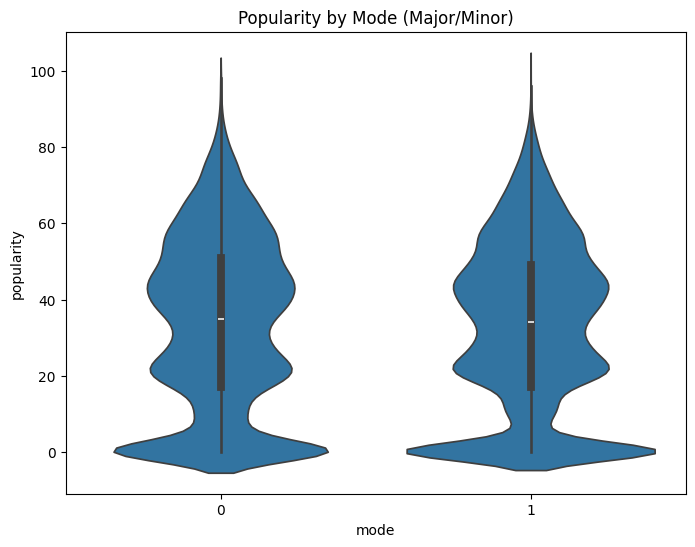

In [110]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='mode', y='popularity', data=df)
plt.title('Popularity by Mode (Major/Minor)')
plt.show()

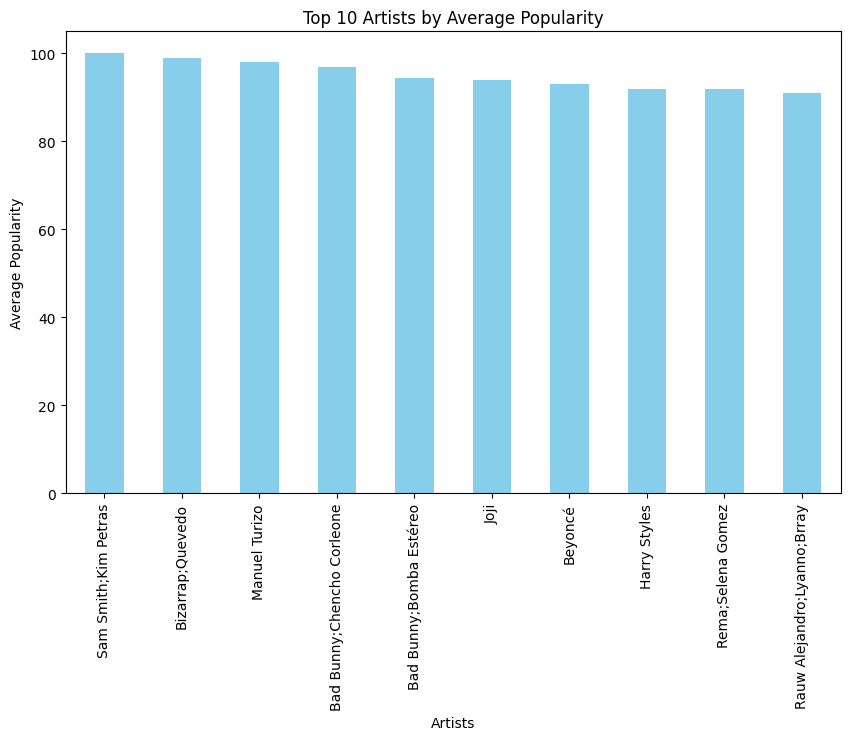

In [111]:
# Grouping by artists and calculating average popularity
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

# Plotting the top 10 artists by average popularity
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artists by Average Popularity')
plt.ylabel('Average Popularity')
plt.xlabel('Artists')
plt.xticks(rotation=90)
plt.show()

In [112]:
df['explicit'] = df['explicit'].map({'true': 1, 'false': 0})

label_cols = ['artists', 'album_name', 'track_name', 'track_genre']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df = df.drop(columns=['track_id'])


In [113]:
# List of numerical columns
numerical_cols = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Initialize a scaler
scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [114]:
print(df.head())
print(df.isnull().sum())
print((df == np.inf).sum())

   Unnamed: 0  artists  album_name  track_name  popularity  duration_ms  \
0           0    10357        8100       11741          73     0.024575   
1           1     3287       14796       22528          55    -0.730859   
2           2    12397       39162       60774          57    -0.160332   
3           3    14839        8580        9580          71    -0.243214   
4           4     5255       16899       25689          82    -0.271919   

   explicit  danceability    energy       key  loudness      mode  \
0       NaN      0.629244 -0.717148 -1.210442  0.300828 -1.326281   
1       NaN     -0.845908 -1.889980 -1.210442 -1.784744  0.753988   
2       NaN     -0.742186 -1.122669 -1.491343 -0.293288  0.753988   
3       NaN     -1.733304 -2.312994 -1.491343 -2.039252  0.753988   
4       NaN      0.295030 -0.788711 -0.929541 -0.282750  0.753988   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.551848     -0.850202         -0.504109  0.7587

In [115]:
# Features (X) and target (y)
X = df.drop(columns=['popularity'])
X = df.drop(columns=['Unnamed: 0'])
X = df.drop(columns=['explicit'])
y = df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Architecture Overview:
**Type:** Sequential Model with layers added in a linear fashion.

### Layers:

-   **Input Layer:** 256 neurons, ReLU activation, L2 regularization.

-   **Batch Normalization:** Applied after the input layer to stabilize training.

### Hidden Layers:

-   128 neurons, ReLU activation, L2 regularization, 30% dropout.

-   64 neurons, ReLU activation, L2 regularization, 30% dropout.

-   32 neurons, ReLU activation, L2 regularization.

-   Output Layer: 1 neuron with linear activation (for regression).

### Compilation:

-   **Optimizer**: Adam with learning rate 0.0001.

-   **Loss Function**: Mean squared error (MSE).

-   **Metrics**: Mean absolute error (MAE).

### Regularization:

-   L2 regularization on all layers.

-   Dropout (30%) in hidden layers to prevent overfitting.

-   Early Stopping: Monitors val_loss, stops training if no improvement for 10 epochs, restores best weights.

### Training Details:
-   **Epochs:** Max 100, with early stopping.

-   **Batch Size**: 64.

-   **Validation Split**: 20% of data used for validation.

**Goal:** A regression model designed for generalization with dropout, L2 regularization, and early stopping to prevent overfitting.

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Build the improved model
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))

# Batch Normalization
model.add(BatchNormalization())

# Hidden layers with regularization and dropout to prevent overfitting
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Increased dropout rate

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression task

# Compile the model with a reduced learning rate and Adam optimizer
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split and early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, 
                    callbacks=[early_stopping], verbose=1)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 875.1386 - mae: 23.8573 - val_loss: 494.0067 - val_mae: 18.5718
Epoch 2/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 520.6704 - mae: 18.9582 - val_loss: 474.9363 - val_mae: 18.1851
Epoch 3/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 270.9707 - mae: 13.1328 - val_loss: 43.7479 - val_mae: 4.8379
Epoch 4/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 62.4816 - mae: 5.9754 - val_loss: 85.4730 - val_mae: 2.3716
Epoch 5/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.7147 - mae: 5.2293 - val_loss: 56.5580 - val_mae: 1.9848
Epoch 6/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 45.9772 - mae: 4.9088 - val_loss: 229.4222 - val_mae: 10.2212
Epoch 7/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 43.3795 - mae: 4.7056 - val_loss: 29.9748 - val_mae: 1.8353
Epoch 8/100
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40.5611 - mae: 4.5236 - val_loss: 111.9057 - val_mae: 3.9189
Epoch 9/100
114

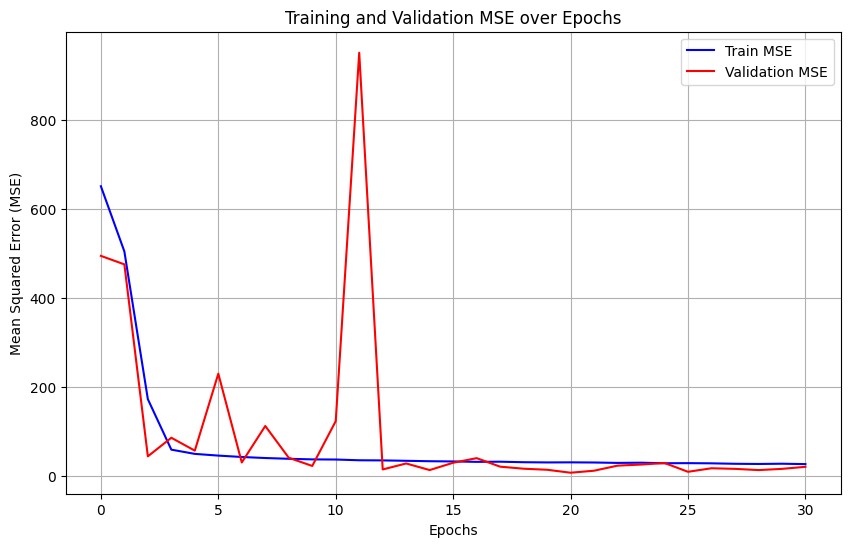

In [117]:
# Extract training and validation MSE
train_mse = history.history['loss']
val_mse = history.history['val_loss']

# Plot training and validation MSE
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Train MSE', color='blue')
plt.plot(val_mse, label='Validation MSE', color='red')
plt.title('Training and Validation MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## Hyperparameters Tuning:
num_neurons_1, num_neurons_2, num_neurons_3: Number of neurons in each of the hidden layers.

dropout_rate: The dropout rate to prevent overfitting.

l2_reg: The strength of L2 regularization applied to the layers.

learning_rate: The learning rate for the Adam optimizer.

In [118]:
import matplotlib.pyplot as plt

def build_model(hp):
    model = Sequential()
    
    # Hyperparameters to tune
    num_neurons_1 = hp.Int('num_neurons_1', min_value=128, max_value=512, step=64)
    num_neurons_2 = hp.Int('num_neurons_2', min_value=64, max_value=256, step=64)
    num_neurons_3 = hp.Int('num_neurons_3', min_value=32, max_value=128, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    l2_reg = hp.Float('l2_reg', min_value=0.001, max_value=0.1, step=0.001)
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')
    
    # Build the model architecture
    model.add(Dense(num_neurons_1, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(Dense(num_neurons_2, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_neurons_3, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression task
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    return model

# Define the hyperparameter search space
tuner = kt.Hyperband(
    build_model,
    objective='val_loss', 
    max_epochs=10, 
    factor=3, 
    directory='my_dir', 
    project_name='hyperparameter_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the hyperparameter tuning
tuner.search(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Get the best model after the tuning
best_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

# Print the best hyperparameters
print("Best Hyperparameters: ")
for key, value in best_hyperparameters.items():
    print(f"{key}: {value}")


Reloading Tuner from my_dir/hyperparameter_tuning/tuner0.json
Best Hyperparameters: 
num_neurons_1: 320
num_neurons_2: 64
num_neurons_3: 32
dropout_rate: 0.2
l2_reg: 0.069
learning_rate: 0.000520665224551133
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Rebuild the model using the best hyperparameters
def build_model_with_best_hyperparameters(best_hyperparameters):
    model = Sequential()
    
    # Get the best hyperparameters
    num_neurons_1 = best_hyperparameters['num_neurons_1']
    num_neurons_2 = best_hyperparameters['num_neurons_2']
    num_neurons_3 = best_hyperparameters['num_neurons_3']
    dropout_rate = best_hyperparameters['dropout_rate']
    l2_reg = best_hyperparameters['l2_reg']
    learning_rate = best_hyperparameters['learning_rate']
    
    # Build the model architecture with the best hyperparameters
    model.add(Dense(num_neurons_1, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())
    model.add(Dense(num_neurons_2, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_neurons_3, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    return model

# Rebuild the model with the best hyperparameters
best_model = build_model_with_best_hyperparameters(best_hyperparameters)

# Train the model with the best hyperparameters
history_best = best_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 702.8669 - mae: 21.4228 - val_loss: 658.2505 - val_mae: 21.0391
Epoch 2/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 271.8679 - mae: 12.2078 - val_loss: 47.8115 - val_mae: 2.1822
Epoch 3/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 57.6265 - mae: 5.0984 - val_loss: 35.2877 - val_mae: 4.2290
Epoch 4/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 52.4736 - mae: 4.8553 - val_loss: 27.3610 - val_mae: 3.7627
Epoch 5/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.8786 - mae: 4.8343 - val_loss: 17.7072 - val_mae: 2.7398
Epoch 6/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 46.6299 - mae: 4.5931 - val_loss: 9.2724 - val_mae: 1.0366
Epoch 7/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 44.5786 - mae: 4.4845 - val_loss: 20.5994 - val_mae: 2.9953
Epoch 8/50
1140/1140 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 45.1756 - mae: 4.5658 - val_loss: 20.3007 - val_mae: 3.1322
Epoch 9/50
1140/114

In [120]:
y_pred = best_model.predict(X_test)

# Convert continuous predictions to integer values (rounding them)
y_pred_rounded = np.round(y_pred).astype(int)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


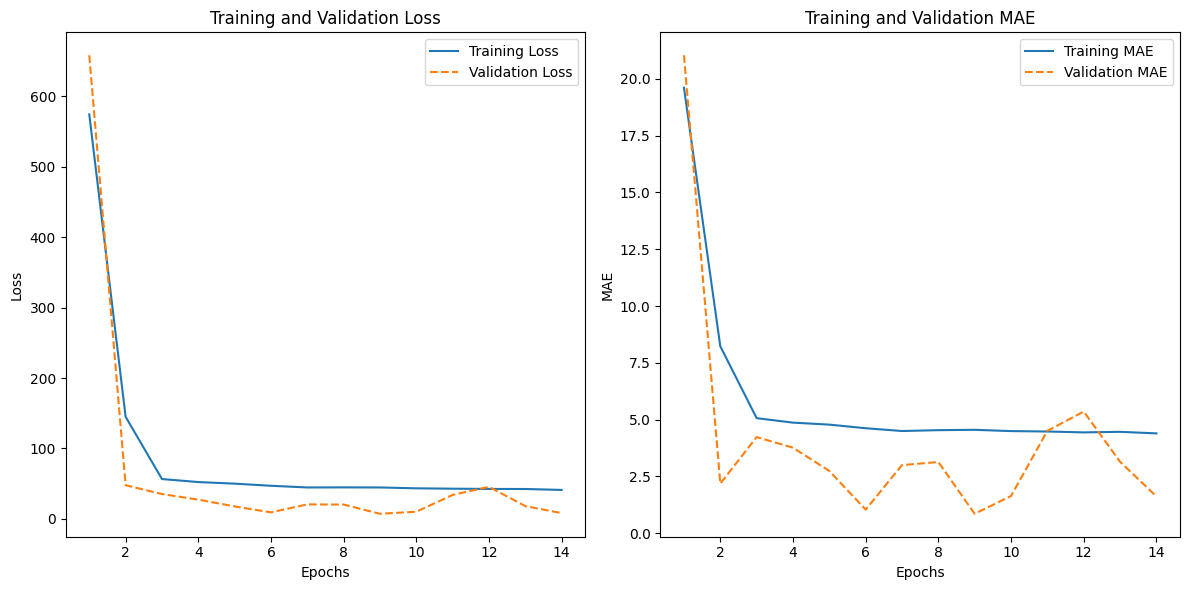

In [121]:
train_loss = history_best.history['loss']
val_loss = history_best.history['val_loss']
train_mae = history_best.history['mae']
val_mae = history_best.history['val_mae']

# Plot the loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


# Plot the MAE over epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_mae) + 1), train_mae, label='Training MAE')
plt.plot(range(1, len(val_mae) + 1), val_mae, label='Validation MAE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

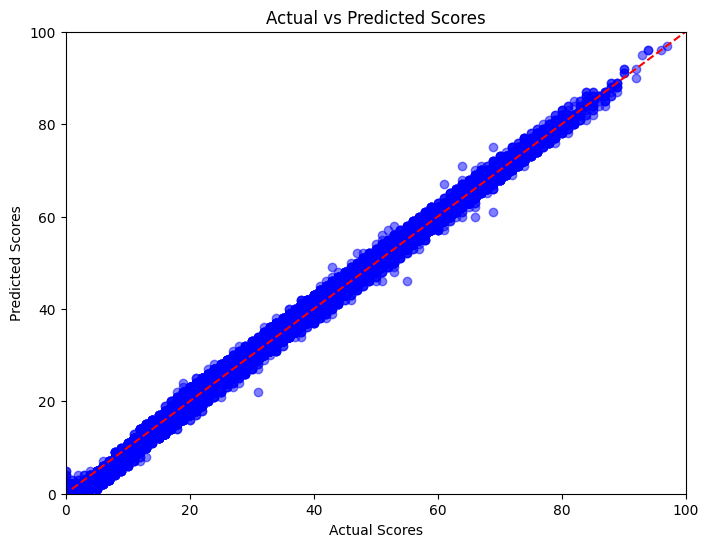

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rounded, alpha=0.5, color='blue')
plt.plot([1, 100], [1, 100], color='red', linestyle='--')  # Ideal line where y_pred = y_test
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred_rounded)
mse = mean_squared_error(y_test, y_pred_rounded)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 0.8144736842105263
Mean Squared Error: 1.671140350877193


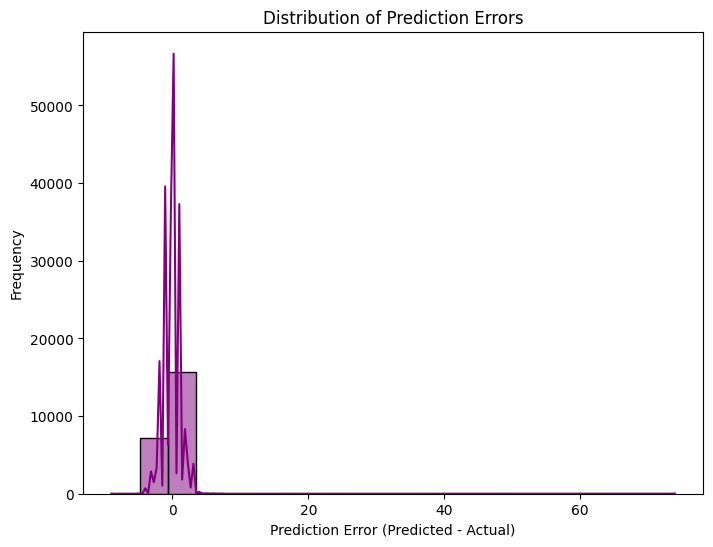

In [124]:
import seaborn as sns

# Ensure y_pred_rounded and y_test are NumPy arrays and flatten them
y_pred_rounded = y_pred_rounded.ravel()  # or y_pred_rounded.flatten()
y_test = y_test.values.ravel() 
errors = y_pred_rounded - y_test

# Plot the distribution of errors
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True, color='purple')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()

Percentage of errors within the lower and upper bounds (non-outliers): 99.91%
Number of outliers: 20 out of 22800 total predictions


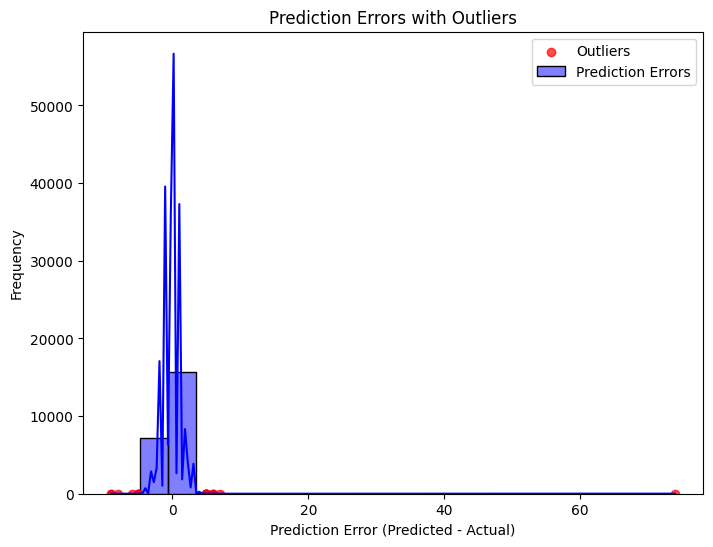

In [125]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the errors (residuals)
errors = y_pred_rounded - y_test

# Calculate the IQR (Interquartile Range)
Q1 = np.percentile(errors, 25)
Q3 = np.percentile(errors, 75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = errors[(errors < lower_bound) | (errors > upper_bound)]

# Count the number of outliers
outliers_count = len(outliers)

# Count the total number of errors
total_count = len(errors)

# Count how many errors are within the bounds (non-outliers)
in_bounds_count = total_count - outliers_count

# Calculate the percentage of errors within the bounds
percentage_in_bounds = (in_bounds_count / total_count) * 100

# Print the percentage of errors within bounds
print(f"Percentage of errors within the lower and upper bounds (non-outliers): {percentage_in_bounds:.2f}%")
print(f"Number of outliers: {outliers_count} out of {total_count} total predictions")

# Plot the histogram of errors and highlight outliers
plt.figure(figsize=(8, 6))

# Plot errors as a histogram
sns.histplot(errors, bins=20, kde=True, color='blue', label='Prediction Errors')

# Mark the outliers with red
plt.scatter(outliers, np.zeros_like(outliers), color='red', label='Outliers', alpha=0.7)

# Adding labels and title
plt.title('Prediction Errors with Outliers')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## Analysis

Overall I am quite pleased with the results of this model.

The model is giving Mean absolute error of about 0.8 and a mean squared error of about 2.6.
Given the fact that popularity is on a scale of 1-100, this is pretty good in my opinion, for such a simple model.

The model is producing only roughly .10% outliers, as defined as values that are outside of 1.5 of the IQR.

What is perhaps most remarkable to me, is that the network is able to achieve these results, despite such a weak correlation bewteen any individual feature and track popularity. 

## Potential pitfalls: 
1) overfitting. Despite some attemmpts at regularization, it appears the model may be a little overfit to the training data
2) Limited evaluation metrics. We are just using MSE. We may consider using RSquared or another metric.

## Next Steps to Improve Model:
1) Consider simpliying the number of neurons in the model.
2) Implement K-Fold cross validation
3) Ensamble methods
4) Consider a more advanced network such as a RNN
